In [1]:
import pickle
import experiment_config

from pathlib import Path

data = [pickle.load(open(p, 'rb')) for p in (Path().cwd() / 'results').iterdir()]

In [2]:
data[0]

{'e_state': ETrainingState(id=1575005714493766677, epoch=200, lagrangian_mu=None, lagrangian_lambda=None, prev_loss=None, prev_acc=None, prev_constraint=None),
 'e_config': EConfig(seed=1134328853, use_cuda=True, model_type=<ModelType.DEEP: 1>, dataset_type=<DatasetType.MNIST: 1>, batch_size=100, epochs=200, optimizer_type=<OptimizerType.SGD_MOMENTUM: 2>, lr=0.01, complexity_type=<ComplexityType.L2: 2>, complexity_lambda=0.1, lagrangian_type=<LagrangianType.NONE: 1>, lagrangian_start_epoch=None, lagrangian_target=None, lagrangian_tolerance=None, lagrangian_start_mu=None, lagrangian_patience_batches=None, lagrangian_improvement_rate=None, lagrangian_start_lambda=None, lagrangian_convergence_tolerance=None, log_batch_freq=None, log_epoch_freq=10, save_epoch_freq=None, log_tensorboard=True, data_dir=PosixPath('/Tmp/rajkuman/slurm-269616/data'), log_dir=PosixPath('/Tmp/rajkuman/slurm-269616/logs'), checkpoint_dir=PosixPath('/Tmp/rajkuman/slurm-269616/checkpoints'), resume_from_checkpoint=F

In [3]:
val_results = [[d['e_config'].complexity_type.name, d['e_config'].complexity_lambda, d['final_results_val'][0].item(), d['final_results_val'][1], d['final_results_val'][2]] for d in data]
train_results = [[d['e_config'].complexity_type.name, d['e_config'].complexity_lambda, d['final_results_train'][0].item(), d['final_results_train'][1], d['final_results_train'][2]] for d in data]

In [4]:
import numpy as np
import pandas as pd

vresults = pd.DataFrame(np.array(val_results), columns=['complexity_type', 'lambda', 'acc', 'loss', 'complexity']).astype(
    {'complexity_type': 'str', 'lambda': 'float32', 'acc': 'float32', 'loss': 'float32', 'complexity': 'float32'})
tresults = pd.DataFrame(np.array(train_results), columns=['complexity_type', 'lambda', 'acc', 'loss', 'complexity']).astype(
    {'complexity_type': 'str', 'lambda': 'float32', 'acc': 'float32', 'loss': 'float32', 'complexity': 'float32'})

In [5]:
vresults['split'] = 'val'
tresults['split'] = 'train'
results = pd.concat([vresults, tresults])
results

,complexity_type,lambda,acc,loss,complexity,split
0,L2,0.1,0.952111,0.196101,5.439560e+00,val
1,L2,0.0,0.965111,0.318421,1.912426e+01,val
2,L2,0.7,0.657333,1.231398,2.346991e+00,val
3,L2,0.5,0.806222,0.784597,3.095120e+00,val
4,L2,1.0,0.100556,2.302608,1.501455e-02,val
...,...,...,...,...,...,...
160,PROD_OF_FRO,1.0,1.000000,0.000073,3.079165e-10,train
161,L2,0.6,0.801941,0.894601,2.877765e+00,train
162,PARAM_NORM,0.7,0.104824,2.302299,5.765659e-04,train
163,SUM_OF_FRO,0.0,1.000000,0.000072,2.626533e+01,train


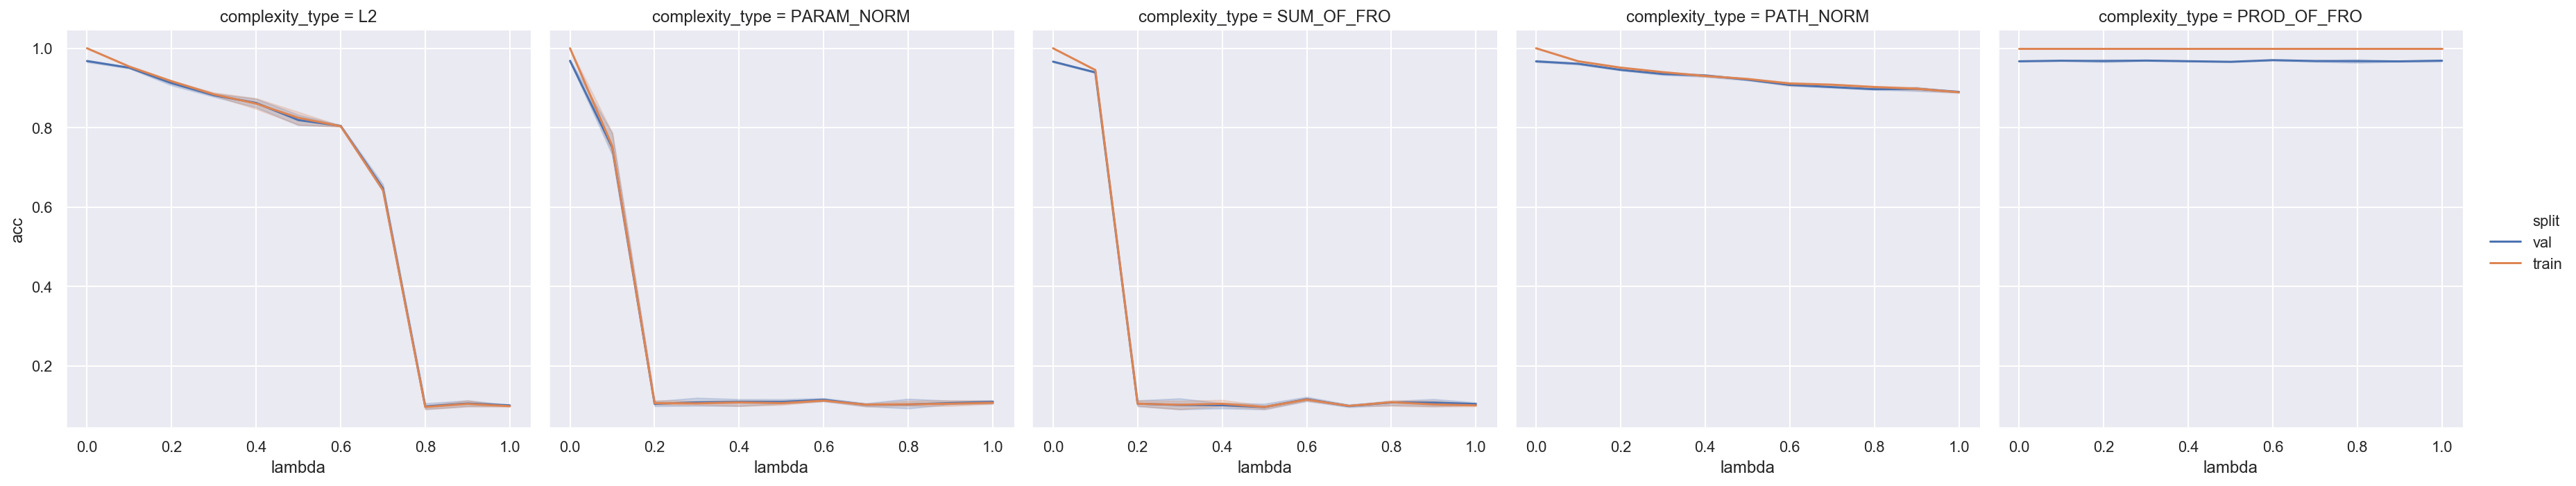

In [6]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set()

g = sns.FacetGrid(results, col='complexity_type', height=5)
g.map(sns.lineplot, 'lambda', 'acc', 'split').add_legend()

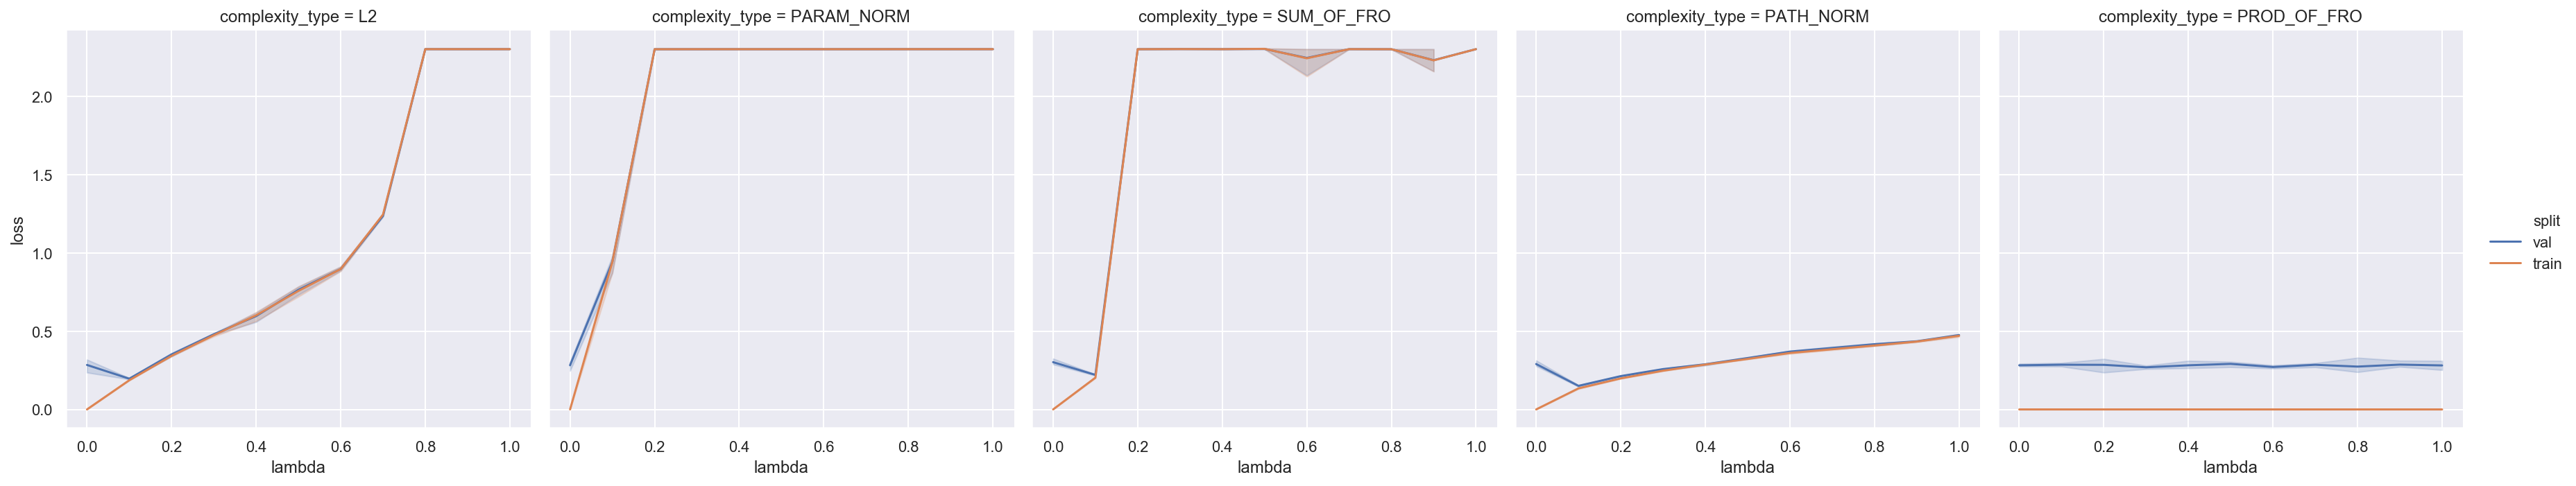

In [7]:
g = sns.FacetGrid(results, col='complexity_type', height=5)
g.map(sns.lineplot, 'lambda', 'loss', 'split').add_legend()

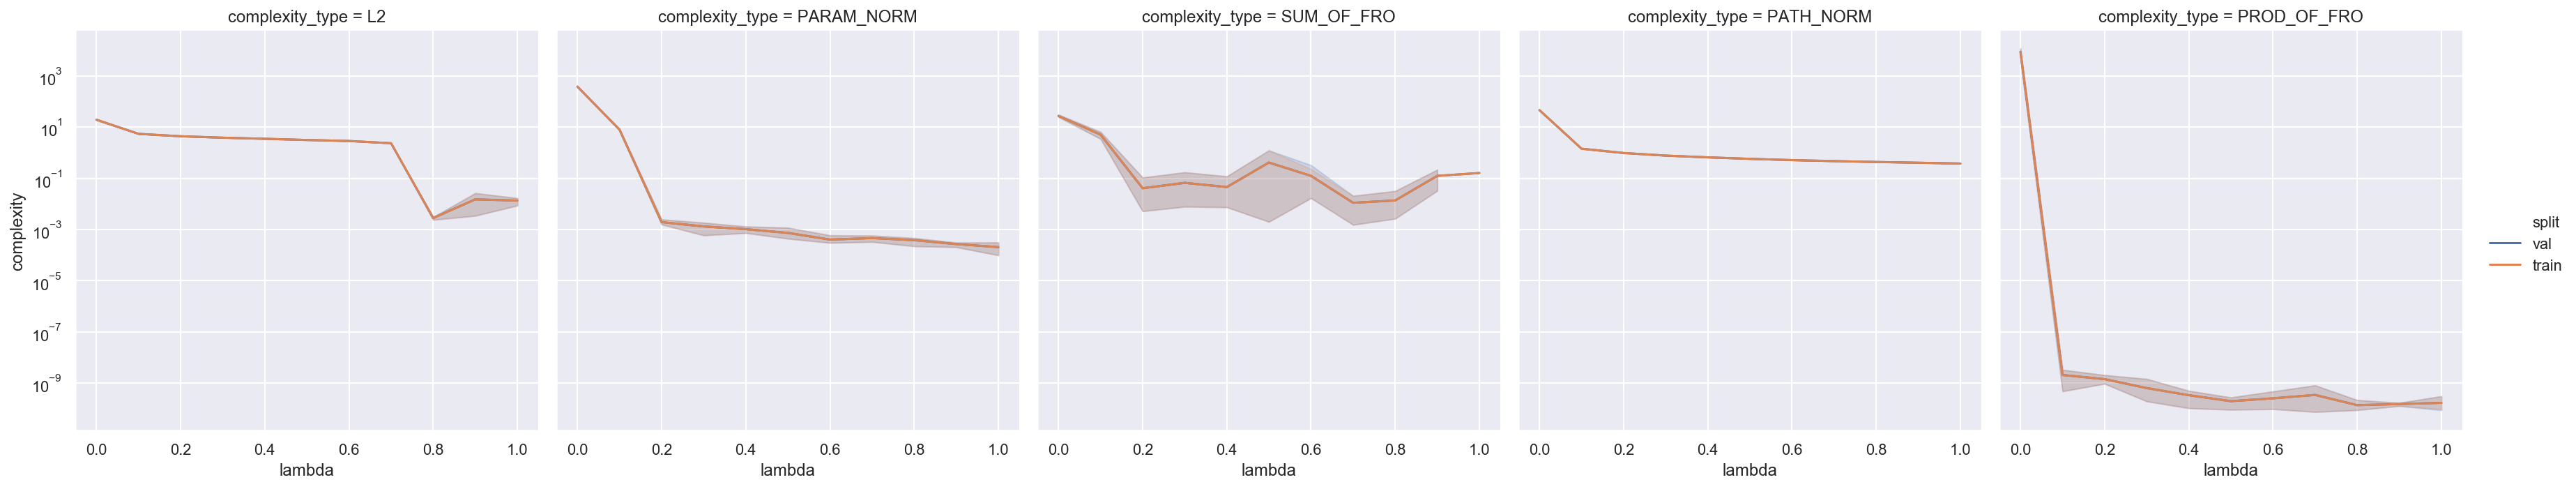

In [8]:
g = sns.FacetGrid(results, col='complexity_type', height=5)
g.map(sns.lineplot, 'lambda', 'complexity', 'split').add_legend().set(yscale = 'log')